# Exploring Color Magnitude Diagrams in Python
##### By: J. Isbell, N. Franz, E. Prather
---

### Background on Notebooks
Some vital information:
1. This is called a "Jupyter Notebook" (said like Jupiter Notebook). It is a common tool used by astronomers to write and develop code for their research.  
2. Each block of code is called a "cell", to run a cell you can click into it with your mouse and either press `Shift-Enter` or `Ctrl-Enter` (`CMD-Enter` on a mac).
3. When you run a cell, some will output plots/figures or text at the bottom of them. This will give you some information about the code and color magnitude diagrams. Other cells won't have any output, and that's okay!
4. You may not understand fully what the code is doing and that is *totally okay*! This is as much about the astronomy as it is the code. Our goal for this notebook is to provide a soft introduction to Python code for those who have never seen it.

---

### Setup for the Notebook

Before doing anything else, we need to execute the following cell by pressing `Shift-Enter`. This cell will install some existing code we need for the Notebook and download some data that we have prepped for it.

In [9]:
# Import useful software for this workbook
import os
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.patches import Ellipse, Rectangle

#############################################################################################################################
######################################### Download and install some Software/Code ###########################################
#############################################################################################################################
data_urls = [
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/notebooks/util.py", # useful code
    "https://raw.githubusercontent.com/noahfranz13/astro-education-nbs/refs/heads/main/data/gaia_cone_search_results.csv", # Gaia results
    "https://github.com/noahfranz13/astro-education-nbs/raw/refs/heads/main/data/isochrones.pkl.zip" # isochrone data
]

for url in data_urls:
    
    # derive the filename from the url
    filename = os.path.join(os.getcwd(), url.split("/")[-1])
    if os.path.exists(filename): continue

    # request the data from that url and write it to a file
    res = urlopen(url)
    with open(filename, "wb") as f:
        f.write(res.read())

try:
    from util import *
except ImportError as exc:
    raise Exception("Please make sure you run the above cell to download all of the other code and data!") from exc
#############################################################################################################################


---

# Key things to include (not necessarily in this order)


## 1. Data loading
- Individual images loading and plotting
- Construct the color index image
- How to extract the stars.... 
- Interactive "radius" 

## 2. Plot a CMD
- Given color index and magnitude, plot in general 
- Make interface to change limits, labels

## 3. Distance modulus
- Latex markup of the equation
- Think about how it scales an isochrone

## 4. Isochrones
- Get a library of pre-computed isochrones at different ages (in abs mag) and metallicities
- The distance is then used to get to apparent mag (at first by us and then by the students)
- Plot range of isochrones
- Think about how to have students match isochrones to the data (chi-by-eye but with reasonable guard rails)

## 5. Boss fight!!! 

---

# 1. Data Loading (more specific)

1. We explain (briefly) the data set and where it comes from 

2. Give them image one and image two, have them assign which belongs to which filter 

3. Display the images (why are they black and white???) -- we should decide on a good scaling and display limits (vmin, vmax) since the dynamic range of the images is likely high
    - probably don't use viridis, black and white is clearer at first 

4. Interface to put in the properly labeled images to get color index 
    - possibly also a dictionary 
    - images = {'blue_filter':image1, 'green_filter': image2}

5. Display color index (coolwarm???)
    - need to show negative values clearly
    - coolwarm might hint at the temperature connection 

6. Extract the stars (either in the background or make them do it interactively -- perhaps also at a later stage)




Which cut is the most important? We guessed parallax 

---
# 2. CMD Display and Interaction

1. Plot a messy CMD with the wrong (default?) limits
2. Identify outliers, think about what they are (bad pixels, galaxies, foreground stars, etc.)
3. Nice interface to change limits (the matplotlib interface is basically clear enough, but we can abstract it one layer)
4. Nice interface to add labels (see below -- dicts are maybe best)
    - could also use dropdowns, but these are functionally equivalent and the point is to expose to some code interaction

In [3]:
#idea for an interface to set labels -- use dicts so that things are clear
#we then process them in the background
labels = {
    "upper-left":   "label1",
    "upper-right":  "label2", 
    "lower-left":   "label3", 
    "lower-right":  "label4"
    }

labels1 = {
    "upper-left":   "bluer, brighter",
    "upper-right":  "redder, brighter", 
    "lower-left":   "bluer, dimmer", 
    "lower-right":  "redder, dimmer"
    }

labels2 = {
    "upper-left":   "hotter, higher mass",
    "upper-right":  "colder, higher mass", 
    "lower-left":   "hotter, lower mass", 
    "lower-right":  "colder, lower mass"
    }



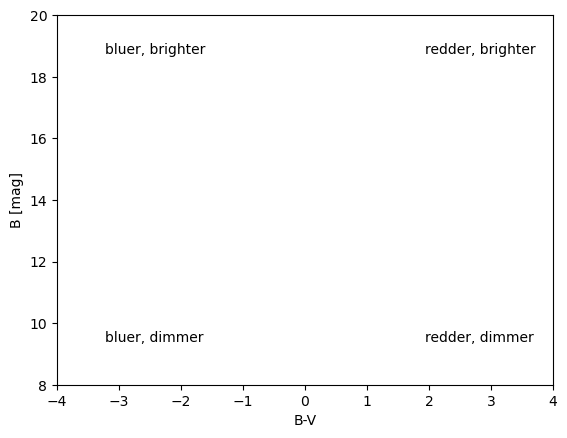

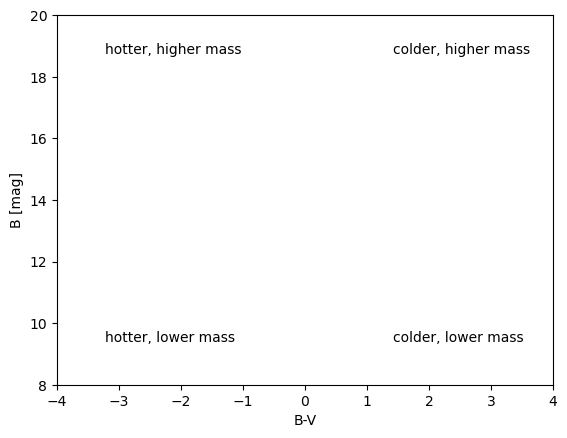

In [4]:
plot_labels_cmd(labels1)

plot_labels_physical(labels2)

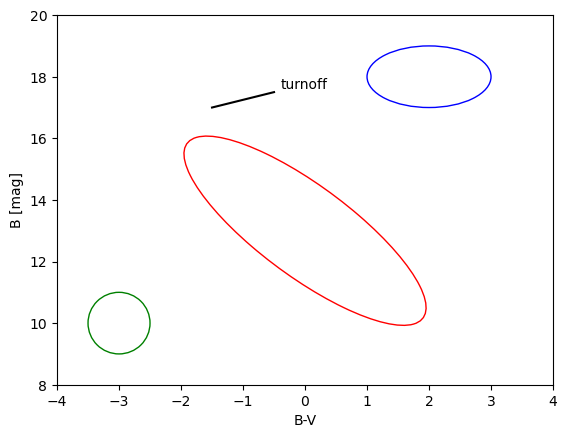

In [5]:
fig, ax = plt.subplots()

ax.set_xlabel('B-V')
ax.set_ylabel('B [mag]')
ax.set_xlim([-4,4])
ax.set_ylim([8,20])

ms_ellipse = Ellipse(xy=(0, 13), width=2, height=7, angle=30, fc='none', ec='r')
ax.add_artist(ms_ellipse)

asb_ellipse = Ellipse(xy=(2, 18), width=2, height=2, angle=0, fc='none', ec='blue')
ax.add_artist(asb_ellipse)

wd_ellipse = Ellipse(xy=(-3, 10), width=1, height=2, angle=0, fc='none', ec='green')
ax.add_artist(wd_ellipse)

label_turnoff(-1.5,17)

plt.show()


---
# 3. Distance Modulus

1. Latex markup for reminder 
    - $m-M = 5 \log_{10}(\frac{d}{10 pc})$


2. Think of how we want them to interact with a function 
    - emphasize that it's really no different than plugging in on pen and paper 
3. Function to apply a distance mod to an isochrone should be well abstracted

--- 
# 4. Isochrones

1. Libarary of pre-computed models for different ages and metallicities
    - maybe [https://waps.cfa.harvard.edu/MIST/model_grids.html](https://waps.cfa.harvard.edu/MIST/model_grids.html)
2. Functions to change them by distance 
3. Interactive element to have them scale/change the values 
    - start with sliders and then move into code entering???
    - display a range of values to guide some guesswork 
4. Ask which isochrones work best and why? 
    - can we find an example where there's some degeneracy? 



In [6]:
isochrones = read_isochrone_files(os.path.join(os.getcwd(), "isochrones.pkl.zip"))

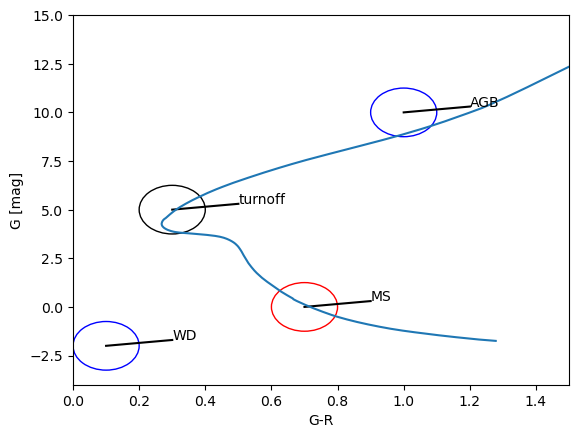

In [7]:
fig, ax = plt.subplots()

ax.set_xlabel('G-R')
ax.set_ylabel('G [mag]')

ax.set_xlim(0,1.5)
ax.set_ylim(-4,15)

def label_turnoff(x,y,label,color='red'):
    ax.text(x+0.2, y+0.3, label)
    ax.plot([x,x+0.2], [y,y+0.3], 'k-')
    ms_ellipse = Ellipse(xy=(x, y), width=0.2, height=2.5, angle=0, fc='none', ec=color)
    ax.add_artist(ms_ellipse)


label_turnoff(0.3,5,'turnoff', color='black')
label_turnoff(0.7,0,'MS', color='red')
label_turnoff(1,10,'AGB', color='blue')
label_turnoff(0.1,-2,'WD', color='blue')




ax.plot(isochrones[-1]['g'].astype(float)-isochrones[-1]['r'].astype(float), isochrones[-1]['g'].astype(float))
plt.show()



NameError: name 'np' is not defined

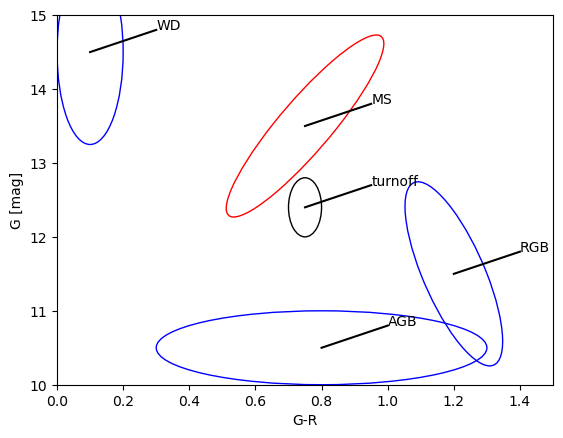

In [8]:

fig, ax = plt.subplots()

ax.set_xlabel('G-R')
ax.set_ylabel('G [mag]')

ax.set_xlim(0,1.5)
ax.set_ylim(10,15)

def label_turnoff(x,y,label,color='red', width=0.2, height=2.5, **kwargs):
    ax.text(x+0.2, y+0.3, label)
    ax.plot([x,x+0.2], [y,y+0.3], 'k-')
    ms_ellipse = Ellipse(xy=(x, y), fc='none', width=width, height=height, ec=color, **kwargs)
    ax.add_artist(ms_ellipse)


label_turnoff(0.75,12.4,'turnoff', width=0.1, height=0.8,color='black')
label_turnoff(0.75,13.5,'MS', color='red', angle=-10)
label_turnoff(1.2,11.5,'RGB', angle=5, color='blue')
label_turnoff(0.8,10.5,'AGB', width=1, height=1, angle=0, color='blue')
label_turnoff(0.1,14.5,'WD', color='blue')

res = cluster_filter()
ax.plot(
    res.phot_bp_mean_mag - res.phot_rp_mean_mag , 
    res.phot_g_mean_mag, 
    marker='.',
    linestyle='none',
    color='k'
)

ax.invert_yaxis()

plt.show()